<div dir=rtl>
به نام خدا 
</div>

<div dir=rtl>
در این فایل، در نظر داریم تا سیستم صفی را مورد بررسی قرار دهیم که
 نرخ ورود آن، در طول زمان تغییر می‌کند. مدلی که در ادامه، پیاده‌سازی خواهیم کرد؛ سوپر مارکت خواهد بود. همان‌طور که می‌دانیم؛ نرخ ورود مشتری‌ها در ساعات اولیه صبح، کم و در ابتدای ظهر، زیاد خواهد شد. این نرخ تا زمانی که به اوج خرید مشتری‌ها، یعنی انتهای عصر، نزدیک شویم؛ کاهش می‌یابد و سپس در آن لحظه، نرخ ورود، بیشترین مقدار خود را خواهد گرفت و پس از آن، مجددا کاهش می‌یابد.
</div>

<div dir=rtl>
ابتدا، کتابخانه‌های مورد نیاز را وارد می‌کنیم.
</div>

In [ ]:
import numpy as np
from numpy.random import poisson,exponential,uniform
import matplotlib.pylab as plt

<div dir=rtl>
سپس، نرخ ورود مشتری‌ها را مطابق با توضیحاتی که در بالا داده شد؛ وارد می‌کنیم. 

</div>

In [ ]:
arrival_rates = [1,1,2,2,2,3,2.5,2.5,2,2,4,3.5,3,3,2,2,1]

<div dir=rtl>
اگر سوپر مارکت، از ساعت هفت صبح الی دوازده شب، باز باشد؛ آنگاه اولین عنصر از لیست بالا، یعنی عدد یک، نشان‌دهنده این است که متوسط تعداد مشتری‌هایی که از ساعت هفت الی هشت صبح، به بانک وارد شده‌اند؛ در هر دقیقه، برابر با یک نفر بوده است.
 همچنین عدد چهار نیز، به عنوان بیشترین میزان نرخ ورود، بیانگر این است که در ساعت  پنج الی شش بعد از ظهر، تعداد مشتری‌ها، به اوج خود رسیده است.
</div>

<div dir=rtl>
با دستور زیر می‌توانیم چک کنیم که فروشگاه، به چه مدت، باز می‌باشد.
</div>



In [ ]:
len(arrival_rates)

17

<div dir=rtl>
بنابراین فروشگاه، هفده ساعت، باز می‌باشد.
</div>

<div dir=rtl>
اکنون پس از تعیین نرخ ورود مشتری‌ها، به سراغ محاسبه تعداد مشتری‌هایی می‌رویم که در بازه‌های زمانی یک ساعته، به سوپرمارکت وارد می‌شوند.
</div>

In [ ]:
number_of_arrivals = np.zeros(len(arrival_rates))

In [ ]:
number_of_arrivals

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<div dir=rtl>
فرایند ورود مشتری‌ها را پواسون در نظر می‌گیریم. به علت این که یک ساعت، شصت دقیقه 
می‌باشد؛ نرخ ورودی را در عدد شصت، ضرب خواهیم کرد. بنابراین، میانگین تعداد مشتری‌ها در بازه‌های زمانی یک ساعته، برابر با arrival_rate * 60 می‌باشد. 
</div>

In [ ]:
for i,arrival_rate in enumerate(arrival_rates):
    number_of_arrivals[i] = poisson(arrival_rate * 60)

In [ ]:
number_of_arrivals

array([ 66.,  49., 108., 109., 115., 168., 134., 138., 142., 108., 230.,
       216., 169., 188., 117., 118.,  57.])

<div dir=rtl>
میانگین تعداد مشتری‌های ورودی در بازه‌های زمانی یک ساعته، عبارت است از:
</div>

In [ ]:
number_of_arrivals.mean()

131.2941176470588

<div dir=rtl>
همان‌طور که مشهود است؛ این عدد، با تقریب خوبی، نشان‌دهنده ضرب نرخ ورودی در عدد شصت می‌باشد.
</div>

<div dir=rtl>
تعداد کل افراد ورودی نیز، عبارت است از:
</div>

In [ ]:
number_of_arrivals.sum()

2232.0

<div dir=rtl>
اکنون میانگین زمانی که یک مشتری، پشت صندوق صرف می‌کند را بر حسب دقیقه در نظر
 می‌گیریم.
</div>

In [ ]:
average_of_service_time = 2.5

<div dir=rtl>
زمان سرویس دهی را از توزیع نمایی در نظر می‌گیریم.
</div>

In [ ]:
service_time = exponential(average_of_service_time,size = int(number_of_arrivals.sum()))

In [ ]:
service_time.mean() , service_time.std()

(2.4622030125083345, 2.452044005222117)

<div dir=rtl>
اگر در یک بازه زمانی یک ساعته، میانگین تعداد مشتری‌ها را در میانگین زمان خدمات ‌هر مشتری، ضرب کنیم؛ آنگاه می‌توانیم زمان مورد نیاز برای رسیدگی به تمام مشتری‌هایی  که در آن بازه، به سوپر مارکت مراجعه کرده‌اند را بر حسب دقیقه، محاسبه کنیم. 
</div>

In [ ]:
time_required_list = []
for arrival_rate in arrival_rates:
    time_required = arrival_rate * 60 * average_of_service_time
    time_required_list.append(time_required)

In [ ]:
time_required_list

[150.0,
 150.0,
 300.0,
 300.0,
 300.0,
 450.0,
 375.0,
 375.0,
 300.0,
 300.0,
 600.0,
 525.0,
 450.0,
 450.0,
 300.0,
 300.0,
 150.0]

<div dir=rtl>
به عنوان مثال در ساعت هفت الی هشت صبح، نرخ ورودی، یک در ساعت می‌باشد و این، بدین معنا خواهد بود که به طور متوسط در آن بازه زمانی، شصت نفر، وارد سوپر مارکت 
می‌شوند. همان‌طور که از نتایج بالا، مشهود است؛ در زمان مذکور، برای رسیدگی به تمام مشتری‌ها، به صد و پنجاه دقیقه، وقت نیاز داریم که معادل با دو و نیم ساعت خواهد بود. اما چون نمی‌توانیم در یک بازه یک ساعته، دو و نیم ساعت را به خدمات اختصاص دهیم؛ بنابراین نیازمند سرورهای بیشتری هستیم. در اینجا، به طور خاص به سه سرور نیاز خواهیم داشت. 
</div>

<div dir=rtl>
برای محاسبه تعداد سرورهای مورد نیاز، به صورت زیر عمل خواهیم کرد:
</div>

In [ ]:
# first case
slack_server = 1
num_required_server_list = []
for i in time_required_list:
    num_required_server = np.array(i/60 + slack_server, dtype = int)
    num_required_server_list.append(num_required_server)

In [ ]:
num_required_server_list

[array(3),
 array(3),
 array(6),
 array(6),
 array(6),
 array(8),
 array(7),
 array(7),
 array(6),
 array(6),
 array(11),
 array(9),
 array(8),
 array(8),
 array(6),
 array(6),
 array(3)]

<div dir=rtl>
و تعداد کل سرورهای مورد نظر را به صورت زیر محاسبه می‌کنیم:
</div>


In [ ]:
total_offered_service_capacity = 0
for el in num_required_server_list:
    total_offered_service_capacity = total_offered_service_capacity + el    

In [ ]:
total_offered_service_capacity

109

<div dir=rtl>
زمان خدمات در مجموع، برابر با مقدار زیر خواهد بود:
</div>

In [ ]:
service_time.sum()

5495.637123918603

<div dir=rtl>
که می‌توانیم آن را بر اساس ساعت نیز بیان کنیم:
</div>

In [ ]:
total_offered_service = service_time.sum() / 60

In [ ]:
total_offered_service 

91.59395206531005

<div dir=rtl>
بنابراین، مطابق با آنچه گفته شد؛ به  total_offered_service  + 1 
سرور، نیاز خواهیم داشت. 

</div>

<div dir=rtl>
همچنین می‌توانیم درصد مشغول بودن و نبودن سرورها را محاسبه کنیم.
</div>

In [ ]:
busy = total_offered_service / total_offered_service_capacity
busy

0.8403114868377068

In [ ]:
idle = 1 - total_offered_service / total_offered_service_capacity
idle

0.15968851316229316

<div dir=rtl>
ما در عبارات بالا، تعداد سرورهای کمکی را برابر با یک در نظر گرفته بودیم. اگر این تعداد را افزایش دهیم؛ واضحا درصد مشغول بودن سرورها، کاهش و درصد مشغول نبودن آن‌ها، افزایش خواهد یافت. به عنوان مثال، اگر تعداد سرورهای کمکی را برابر با سه در نظر بگیریم؛ خواهیم داشت که:
</div>

<div dir=rtl>
پس از آن، زمان ورود هر مشتری را به صورت زیر محاسبه می‌کنیم.
</div>

In [ ]:
arrival_times = np.zeros(int(number_of_arrivals.sum()) + 1)
arrival_times

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
number_of_arrivals

array([ 66.,  49., 108., 109., 115., 168., 134., 138., 142., 108., 230.,
       216., 169., 188., 117., 118.,  57.])

In [ ]:
number_of_arrivals_list = []
for i in number_of_arrivals:
    number_of_arrivals_list.append(int(i))

In [ ]:
number_of_arrivals_list

[66,
 49,
 108,
 109,
 115,
 168,
 134,
 138,
 142,
 108,
 230,
 216,
 169,
 188,
 117,
 118,
 57]

<div dir=rtl>
می‌دانیم که طبق قضیه‌ای که ارتباط میان توزیع پواسون و نمایی را مشخص می‌کند؛ اگر 
زمان میان ورود دو مشتری، نمایی باشد و در یک بازه مشخص، تعداد مشخصی مشتری وارد شوند؛ آنگاه زمان ورود این مشتری‌ها در این بازه، به صورت یکنواخت توزیع خواهد شد. 
</div>

In [ ]:
start = 1
for n in number_of_arrivals_list:
    
    arrival_times[start : start + n] = arrival_times[start - 1] + sorted(uniform(0,60,size = n))
    start += n

In [ ]:
arrival_times[0:10]

array([ 0.        ,  4.64767262,  6.75198057,  7.76782293,  8.0726026 ,
        8.18942409,  9.26713225, 10.01180692, 10.1289119 , 10.37352745])

<div dir=rtl>
اکنون، زمان آن رسیده تا زمان انتظار مشتری‌ها را در طول زمان بررسی کنیم. 
</div>

<div dir=rtl>
خوب است تا دو حالت زیر را مد نظر قرار دهیم و آن‌ها را با هم مقایسه کنیم:

* حالت اول: یک سرور با سرعت چند برابر یک سرور معمولی
* حالت دوم: چندین سرور با سرعت معمولی 
</div>

<div dir=rtl>
بررسی حالت اول:
</div>

<div dir=rtl>
در ابتدا، لیستی به طول تعداد کل مشتری‌هایی که به سوپرمارکت وارد شده‌اند؛ ایجاد می‌کنیم.
</div>

In [ ]:
waiting_times = np.zeros_like(service_time)

In [ ]:
waiting_times

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
len(waiting_times) 

2232

In [ ]:
for k in range(1,len(waiting_times)):
    interarrival_time= arrival_times[k] - arrival_times[k-1]
    c = num_required_server_list[int(arrival_times[k]/60)]
    waiting_times[k] = max(waiting_times[k-1] + service_time[k] / c - interarrival_time ,0)

In [ ]:
waiting_times.mean(),waiting_times.std(),np.max(waiting_times)

(2.041641681546452, 1.8956034294939237, 8.812739309537564)

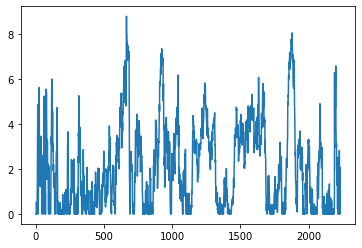

In [ ]:
plt.plot(waiting_times)

<div dir=rtl>
بررسی حالت دوم:
</div>

<div dir=rtl>
در هر بازه زمانی، به تعدادی سرور نیاز داشتیم. بیشترین تعداد سرورها را مطابق با دستور زیر به دست می‌آوریم.  
</div>

In [ ]:
max_num_required_server = max(num_required_server_list)

In [ ]:
max_num_required_server

array(11)

In [ ]:
ones_list = np.ones(max_num_required_server,dtype = int)
ones_list

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
server_wait = np.zeros(max_num_required_server)
Waiting_times = np.zeros_like(service_time) 

for k in range(1,len(Waiting_times)):
    Interarrival_time = arrival_times[k] - arrival_times[k-1]
    c = num_required_server_list[int(arrival_times[k]/60)]
    choosen_server = server_wait[:c].argmin()
    Waiting_times[k] = server_wait[choosen_server]
    server_wait[choosen_server] += service_time[k]
    server_wait = np.maximum(0,server_wait-Interarrival_time*ones_list)

In [ ]:
Waiting_times.mean(),Waiting_times.std(), np.max(Waiting_times)

(1.2208330253557742, 1.537532536181855, 8.10567500626753)

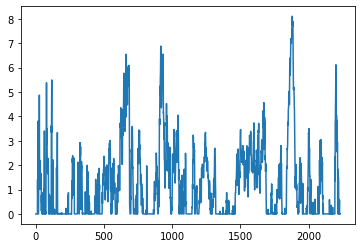

In [ ]:
plt.plot(Waiting_times)
plt.show()

<div dir=rtl>
 نمودار حالت اول را مجددا رسم می‌کنیم تا شباهت بین دو نمودار را به صورت
  واضح‌تری ببینیم.
</div>

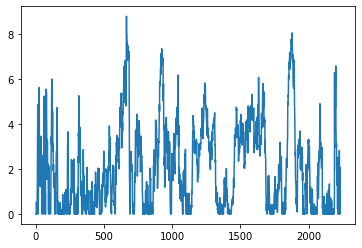

In [ ]:
plt.plot(waiting_times)
plt.show()

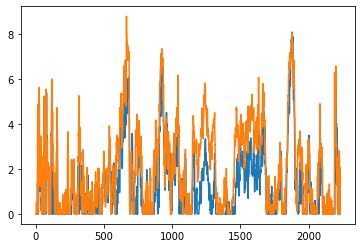

In [ ]:
plt.plot(Waiting_times)
plt.plot(waiting_times)
plt.show()

<div dir=rtl>
همان‌طور که مشاهده می‌کنید؛ نمودار‌ها به طور کلی، یکسان هستند.
</div>